In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160703)
tf.set_random_seed(20160703)

/Users/admin/.pyenv/versions/anaconda3-2.4.0/envs/tensorFlow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
mnist = input_data.read_data_sets("tmp/data/", one_hot=True)

Extracting tmp/data/train-images-idx3-ubyte.gz
Extracting tmp/data/train-labels-idx1-ubyte.gz
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
num_filters = 16

x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv = tf.Variable(tf.truncated_normal([5,5,1,num_filters],stddev=0.1))
h_conv = tf.nn.conv2d(x_image, W_conv, strides=[1,1,1,1], padding='SAME')
h_pool = tf.nn.max_pool(h_conv, ksize=[1,2,2,1], strides=[1,2,2,1],padding='SAME')

In [4]:
h_pool_flat = tf.reshape(h_pool,[-1, 14*14*num_filters])

num_units1 = 14 * 14 * num_filters
num_units2 =  1024

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.relu(tf.matmul(h_pool_flat, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden2, w0) + b0)

In [5]:
t = tf.placeholder(tf.float32, [None,10])
loss = -tf.reduce_sum(t*tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p,1), tf.argmax(t,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()
saver.restore(sess,'./sessions/mdc-session-4000')

INFO:tensorflow:Restoring parameters from ./sessions/mdc-session-4000


In [7]:
filter_vals, conv_vals, pool_vals = sess.run([W_conv, h_conv, h_pool], feed_dict={x:mnist.test.images[:9]})

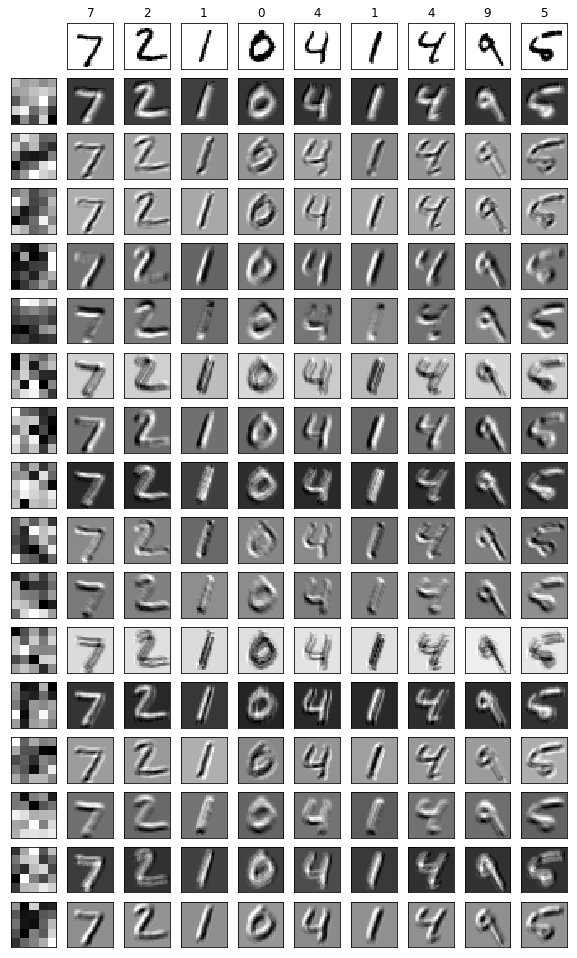

In [10]:
fig = plt.figure(figsize=(10,num_filters+1))

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1,10,10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r, interpolation='nearest')
    
for i in range(9):
    subplot = fig.add_subplot(num_filters+1,10,i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(mnist.test.labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    
    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters+1,10,10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(conv_vals[i,:,:,f], cmap=plt.cm.gray_r, interpolation='nearest')
fig

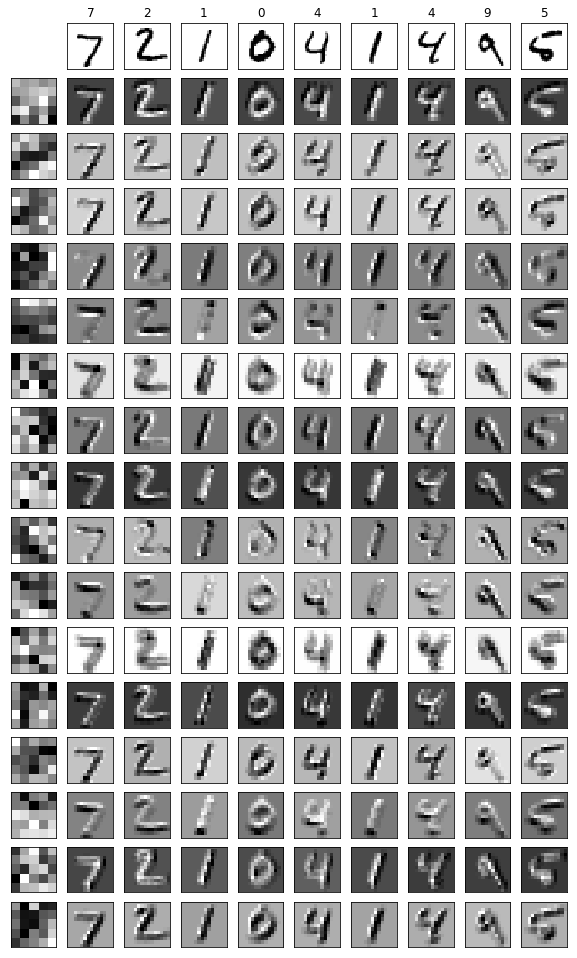

In [11]:
fig = plt.figure(figsize=(10,num_filters+1))

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1,10,10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r, interpolation='nearest')
    
for i in range(9):
    subplot = fig.add_subplot(num_filters+1,10,i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(mnist.test.labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    
    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters+1,10,10*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(pool_vals[i,:,:,f], cmap=plt.cm.gray_r, interpolation='nearest')
fig

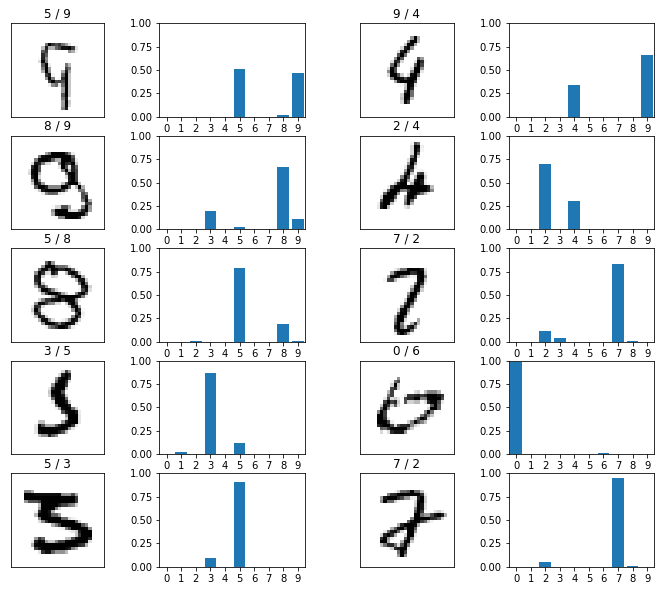

In [15]:
fig = plt.figure(figsize=(12,10))
c = 0
for (image,label) in zip(mnist.test.images, mnist.test.labels):
    p_val = sess.run(p, feed_dict={x:[image]})
    pred = p_val[0]
    prediction, actual = np.argmax(pred), np.argmax(label)
    if prediction == actual:
        continue
    subplot = fig.add_subplot(5,4,c*2+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d / %d' % (prediction, actual))
    subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    subplot = fig.add_subplot(5,4,c*2+2)
    subplot.set_xticks(range(10))
    subplot.set_xlim(-0.5,9.5)
    subplot.set_ylim(0,1)
    subplot.bar(range(10),pred,align='center')
    c+=1
    if c == 10:
        break
fig